<a href="https://colab.research.google.com/github/santiagoruizmoreno/BigData/blob/main/fairness_santiago_akhilesh_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, f1_score
from sklearn.preprocessing import normalize
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix

In [ ]:
# Importing the dataset
uploaded_dataset = files.upload()

Saving cll_dataset.csv to cll_dataset.csv


In [ ]:
# cll dataset
datafile = pd.read_csv("cll_dataset.csv")
# 0- read the file
datafile.head()
# a row is a sample = a patient

# column 'Treat6m' recurrence of the disease, 1 if true, 0 if false
# other columns are features = rate of several types of cells and molecules in the patient
# -----------------------------------------------------------------------------------------
# 1- create X the features, Y the predictions
Y = datafile["Treat6m"]
X = datafile.drop('Treat6m', 1)
# 2- create a function 'fit_rf' that fit random forests on xtrain, ytrain

def fit_rf(xtrain, ytrain, xtest, ytest):
  clf = RandomForestClassifier(max_depth = 2, random_state = 0)
  fitted_model = clf.fit(xtrain, ytrain)
  return fitted_model.score(xtest, ytest)

# it should return the random forest score on the xtest, ytest set.
# use sklearn implementation

# Splitting the data into test and train

# 3- create a function 'repeat_experiment' that will re-shuffle the dataset and fit a classifier a hundred times

# Setting up the parameters of the model
train_ratio = 0.5


def repeat_experiment(dataX,dataY, times,train_ratio = 0.3):
  scores = []
  for i in range(0, times):
    x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
    scores.append(fit_rf(x_train, y_train, x_test, y_test))
  return np.array(scores)

# store the score at each iteration
# return the average score on the hundred iterations
print("Mean average error")
print(repeat_experiment(X, Y, 100).mean())

# 4- Is it good ? (check score averaged over a hundred experiments)

# The model's overall performance, measured by the mean accuracy, is 0.75 which is much better than random.

# 5- Is it actually good ? try to predict only vectors with 'Treat6m' = 1

# Getting a given dataset only containing positive values for Treat6m

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1 - train_ratio)

x_test_values_1 =  pd.DataFrame(x_test)
x_test_values_1['Treat6m'] = y_test
data_test_values_1 = x_test_values_1[x_test_values_1.Treat6m == 1]

Y_1 = data_test_values_1['Treat6m']
X_1 = data_test_values_1.drop('Treat6m', 1)

# Per-class precision on 1. 

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
fitted_model = clf.fit(x_train, y_train)

precision = precision_score(Y_1, fitted_model.predict(X_1), average='macro')
print("------------------  Precision    ----------------")
print(precision)

# Using the f1_score
print("------------------  F1 Score     -----------------")
print(f1_score(Y_1, fitted_model.predict(X_1), average='macro'))

# Our Random Forest model is not able to predict with a fair accuracy the label = 1 !!!

...
# 5- Why is it actually pretty bad ?

# Because it is not able to predict the zero labels properly !!
print("------------------  Value Counts     -----------------")
datafile['Treat6m'].value_counts()

# The observations corresponding to the valule 1 are much more rare, and therefore the model has less data to predict it well.

# help: ratio of class 1 and class 0 in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


Mean average error
0.7354545454545451
------------------  Precision    ----------------
0.0
------------------  F1 Score     -----------------
0.0
------------------  Value Counts     -----------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    24
1     7
Name: Treat6m, dtype: int64

In [ ]:
# Importing the data
uploaded_dataset = files.upload()

Saving gender_biased.csv to gender_biased.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


------------------  Score    ----------------
0.851


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


------------------  Precision    ----------------
0.8509136146178339
------------------  F1 Score     -----------------
0.8509068167604753


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


        predicted  observed
gender                     
0.0           523       523
1.0           477       477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


------------------  Fair Score    ----------------
0.851
------------------  Fair Precision    ----------------
0.8510714972131462
------------------  Fair F1 Score     -----------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


0.8509068167604754
        predicted  observed
gender                     
0.0           564       564
1.0           436       436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


------------------  Fair 2 Score    ----------------
0.834


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:126: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


------------------  Fair 2 Precision    ----------------
0.8361747297992794
------------------  Fair 2 F1 Score     -----------------
0.8338504654188771
        predicted  observed
gender                     
0.0           551       551
1.0           449       449


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:137: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:148: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/

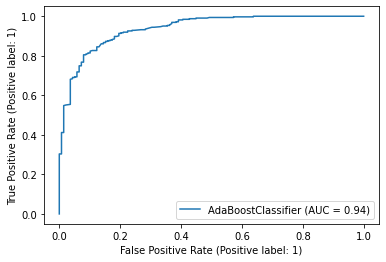

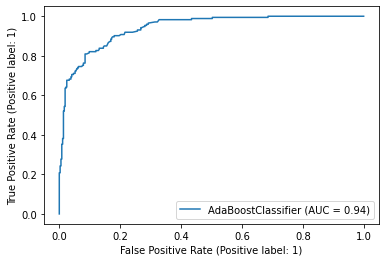

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:182: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


        predicted  observed
gender                     
0.0           530       530
1.0           470       470


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:187: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
# Amazon has recorded some data from its job interviews.
genderdatafile = pd.read_csv("gender_biased.csv")
# 0- read the file
genderdatafile.head()
# After compiling all the data,
# they came with a pair of features called "skills" and "human fit"
# that are supposed to be sufficient to predict whether a candidate is worth interviewing.
# 1- Which feature should not be taken into account to discriminate candidates ?

# Using the gender feature can be associated with gender discrimination. For this reason, and in order
# to consider only the worker's skills, we will get rid off this variable from the dataset. 

# we call this feature "sensitive"

# 2- Fit classifiers of your choice on the given dataset (output is "selected" column)
# do not use the "sensitive" feature!!!


# I will stick with Random Forest for I already know the codes that are needed.

genderdatafile_nonsensitive = genderdatafile
dataY   = genderdatafile_nonsensitive['selected']
dataX   = genderdatafile_nonsensitive.drop('selected', 1)

train_ratio = 0.5
x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g)


# 3- Evaluate the classifiers

# Printing some random accuracy measures
print("------------------  Score    ----------------")
print(fitted_model.score(x_test_g.drop('gender', 1),y_test_g))

precision = precision_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro')
print("------------------  Precision    ----------------")
print(precision)

# Using the f1_score
print("------------------  F1 Score     -----------------")
print(f1_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro'))


# 4- What is the impact of automatic decision on the "protected group" (the one with sensitive=1)?

# Check which sample is more likely to be selected
# Collecting the info corresponing to thepreictions
x_test_g['predicted'] = fitted_model.predict(x_test_g.drop('gender', 1)) 
x_test_g['observed'] = y_test_g
print(x_test_g.groupby('gender').count()[['predicted','observed']])

# It is worth nothing that when it comes to the performance of the model. It is able to predict
# accurately the number of observed selections by gender. Nevertheless, it is possible to see 
# that one of the groups is much more likely to be selected to the interview than the other one.
# That is to say that we are witnessing a gender  bias.

# 5- In sklearn, you can put a weight on samples

x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


# Since we want to provide more weight to the gender 0, we need to do a small modification of the variable gender
# Creating a function to fit the weights
def fair(dummy):
  n_1 = x_train_g['gender'].sum()
  n_2 = len(x_train_g['gender']) - n_1
  n = n_1 + n_2
  dummy_inverse = []
  for value in dummy:
    if value == 1:
      dummy_inverse.append(1/n)
    else :
      dummy_inverse.append(1/n)
  
  return dummy_inverse

# Let's put the same weitgh on each sample
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g, sample_weight = fair(x_train_g['gender']))

# Find a weighting strategy to compute a fair classification
...
# 6- Evaluate your classifier, check the trade-off between fairness and accuracy
print("------------------  Fair Score    ----------------")
print(fitted_model.score(x_test_g.drop('gender', 1),y_test_g))

precision = precision_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro')
print("------------------  Fair Precision    ----------------")
print(precision)

# Using the f1_score
print("------------------  Fair F1 Score     -----------------")
print(f1_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro'))


x_test_g['predicted'] = fitted_model.predict(x_test_g.drop('gender', 1)) 
x_test_g['observed'] = y_test_g
print(x_test_g.groupby('gender').count()[['predicted','observed']])

# -------------------------------------------------------------------------------
# If we assign the same weight to all observations then our results in terms of gender bias improve just a little.

x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


def compensation(dummy, weight):
  dummy_inverse = []
  for value in dummy:
    if value == 1:
      dummy_inverse.append(1)
    else :
      dummy_inverse.append(1*weight)
  norm = [float(i)/max(dummy_inverse) for i in dummy_inverse]
  return norm

# Let's put the same weitgh on each sample
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g, sample_weight = compensation(x_train_g['gender'], weight = 2))

# Find a weighting strategy to compute a fair classification
...
# 6- Evaluate your classifier, check the trade-off between fairness and accuracy
print("------------------  Fair 2 Score    ----------------")
print(fitted_model.score(x_test_g.drop('gender', 1),y_test_g))

precision = precision_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro')
print("------------------  Fair 2 Precision    ----------------")
print(precision) 

# Using the f1_score
print("------------------  Fair 2 F1 Score     -----------------")
print(f1_score(y_test_g, fitted_model.predict(x_test_g.drop('gender', 1)), average='macro'))


x_test_g['predicted'] = fitted_model.predict(x_test_g.drop('gender', 1)) 
x_test_g['observed'] = y_test_g
print(x_test_g.groupby('gender').count()[['predicted','observed']])



# 7- Another strategy here would be post-processing
# train the classifier without re-weighting the samples

x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g)

x_test_g['predicted'] = fitted_model.predict(x_test_g.drop('gender', 1)) 
x_test_g['observed'] = y_test_g

# I did not actually quite get what we had to do here.

# 8- Plot ROC curve for the "protected group" (sensitive=1)

x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g)

# 8- Plot ROC curve for the "protected group" (sensitive=1)
df=genderdatafile.loc[genderdatafile['gender']==1]
dfy=df['selected']
dfx=df.drop('selected',1)
x_train_g1, x_test_g1, y_train_g1, y_test_g1 = train_test_split(dfx, dfy, test_size = 1 - train_ratio)

# 9- On the same graph, plot the ROC curve for the "unprotected group" (sensitive=0)
df0=genderdatafile.loc[genderdatafile['gender']==0]
dfy0=df0['selected']
dfx0=df0.drop('selected',1)
x_train_g0, x_test_g0, y_train_g0, y_test_g0 = train_test_split(dfx0, dfy0, test_size = 1 - train_ratio)

metrics.plot_roc_curve(clf, x_test_g1.drop('gender',1), y_test_g1)
metrics.plot_roc_curve(clf, x_test_g0.drop('gender',1), y_test_g0)
plt.show()

# 10- Find a fair thresholding rule on the prediction of your classifier

# Setting different thresholds.
x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(dataX, dataY, test_size = 1 - train_ratio)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
fitted_model = clf.fit(x_train_g.drop('gender', 1), y_train_g, sample_weight = fair(x_train_g['gender']))

# Assigning a higher threshold for the positive predictions t = 0 .52, 0.48, 0.34
# We don't know if we commit an error, but we tried 

y_pred = (clf.predict_proba(x_test_g.drop('gender', 1))[:,1] >= 2).astype(bool)*1
y_pred

x_test_g['predicted'] = y_pred
x_test_g['observed'] = y_test_g
print(x_test_g.groupby('gender').count()[['predicted','observed']])
#
# 11- Evaluate trade-off between accuracy and fairness

# Most of the time we need to sacrifice accuracy in order to make results fairer.
# That was indeed the case in this example


